# **K2 algorithm** | implementation in bnstruct

Project for *Advanced Statistics for Physics Analysis*, University of Padua, A.Y. 2021/22<br>
**Learning the topology of a Bayesian Network from a database of cases using the K2 algorithm**

**Students** | Francesco Pio Barone, Gianmarco Nagaro Quiroz, Daniele Ninni

***


In this notebook we show how the routines implemented in the previous notebooks are included inside the bnstruct package.

In order to make this work, we download the source code of bnstruct and apply our costumizations.

```
bnstruct
 ├ R
 | ├  k2.R    (our implementation of K2)
 │ ├  learn-methods.R   (changes to include K2 in learn algorithms)
 │ └   ...
 ├ DESCRIPTION
 └ ...
```


In [1]:
library(tidyverse) |> suppressPackageStartupMessages()
library(Rgraphviz) |> suppressPackageStartupMessages()

In [2]:
library(devtools)

Loading required package: usethis



The library can be loaded without installing it on the system.

In [3]:
load_all('./bnstruct-custom') |> suppressPackageStartupMessages()

ℹ Loading bnstruct


## test on SACHS dataset

Just to test out our implementation, let us use a sample dataset.

In [4]:
sachs <- read_csv('https://www.ccd.pitt.edu/wiki/images/SACHS10k.csv')
sachs <- sachs |> select(PKC, Plcg, PKA, PIP3, Raf, Jnk, P38, PIP2, Mek, Erk, Akt) # good res
head(sachs)

Rows: 10000 Columns: 11
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (11): Akt, Erk, Jnk, Mek, P38, PIP2, PIP3, PKA, PKC, Plcg, Raf

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


PKC,Plcg,PKA,PIP3,Raf,Jnk,P38,PIP2,Mek,Erk,Akt
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,1,2,2,1,1,1,1,1,1,1
2,1,2,2,1,1,2,1,1,2,1
1,3,1,2,3,3,3,2,1,1,1
1,1,3,3,2,1,1,1,1,2,1
2,2,2,3,1,1,1,1,1,2,1
2,1,2,1,2,2,1,1,2,2,1


In [5]:
dataset <- BNDataset(data = sachs, variables = names(sachs),
                     discreteness = TRUE,
                     node.sizes = c(3,3,3,3,3,3,3,3,3,3,3) )

# documentation: https://www.rdocumentation.org/packages/bnstruct/versions/1.0.12/topics/BNDataset-class

### learn with MMHC

In [6]:
network <- learn.network(dataset)

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.



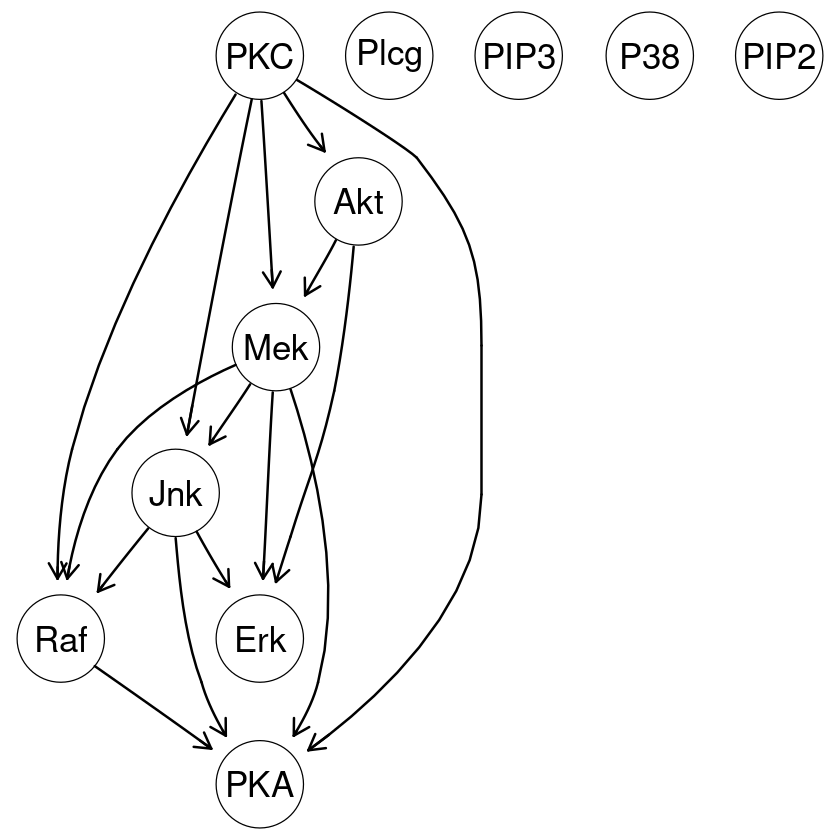

In [7]:
plot(network)

### calling our algo

Now we call the K2 algorithm.

In [8]:
network <- learn.network(dataset, algo='k2')

bnstruct :: learning the structure using (custom) K2 ...

bnstruct :: learning using (custom) K2 completed (8.606 s).

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.



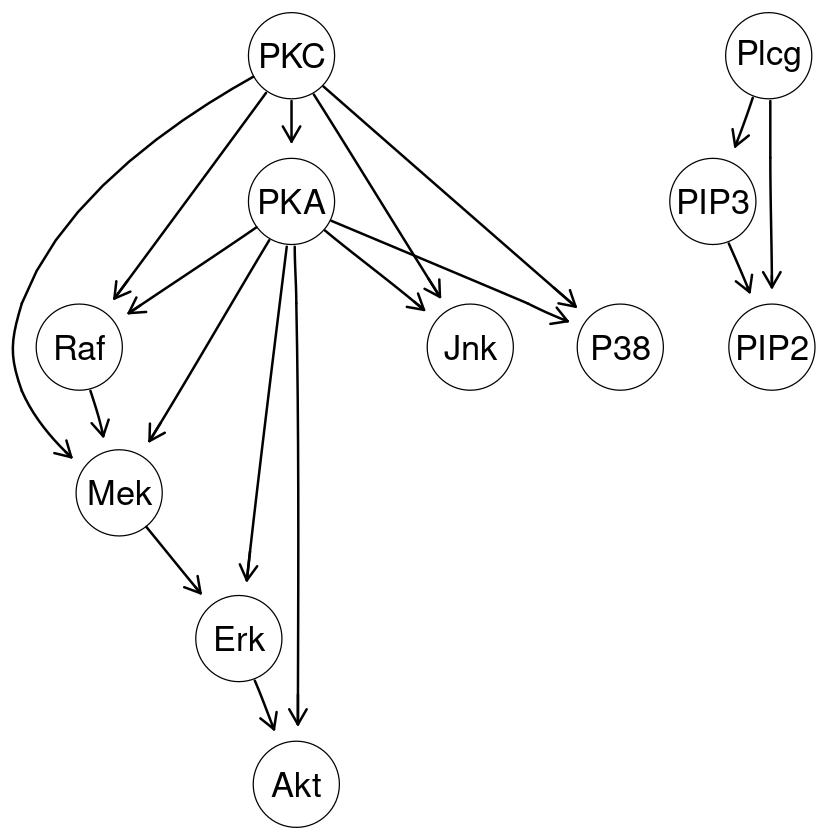

In [9]:
plot(network)

In [10]:
dataset <- asia()
dataset <- bootstrap(dataset)

bnstruct :: Generating bootstrap samples ...

bnstruct :: Bootstrap samples generated.



In [11]:
dataset


Dataset: 

num.variables 8

variables
Asia Tubercolosys Smoke LungCancer Bronchitis Either X-ray Dyspnea
discreteness
TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
node.sizes
2 2 2 2 2 2 2 2
num.items
10000
imputation
FALSE
has.boots
TRUE
has.imputed.boots
FALSE
num.boots
100

In [12]:
network <- learn.network(dataset, algo='k2')

bnstruct :: learning the structure using (custom) K2 ...

bnstruct :: learning using (custom) K2 completed (3.292 s).

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.



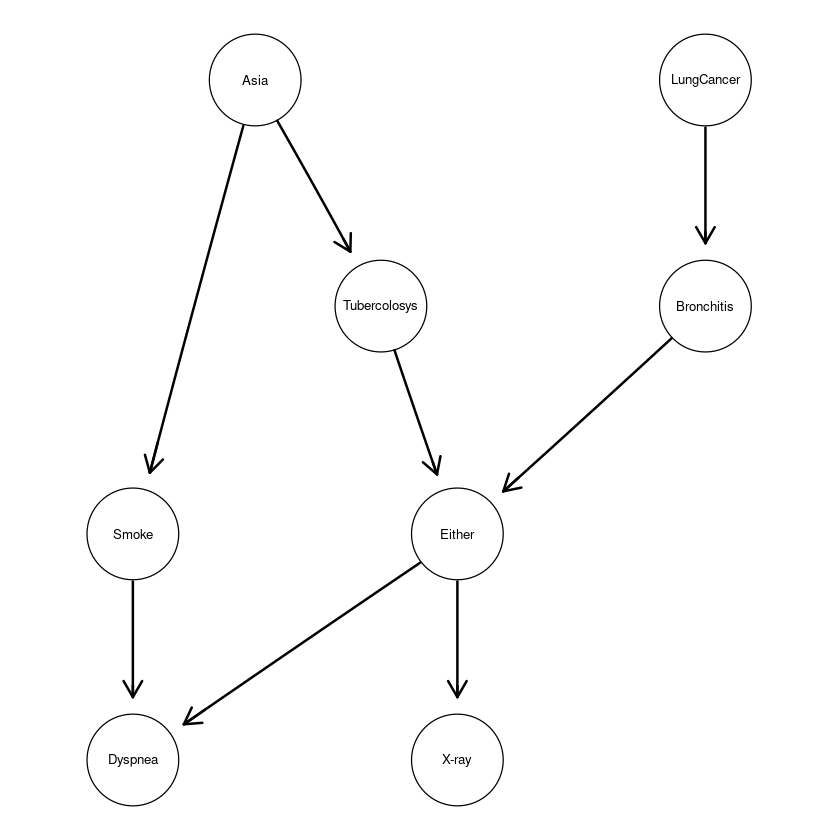

In [13]:
plot(network)

## **References**

<a id='ref1'></a>
**[1]** M. Scutari and J. B. Denis, *Bayesian Networks*, CRC Press, 2022, Taylor and Francis Group

<a id='ref2'></a>
**[2]** G. F. Cooper and E. Herskovits, *A Bayesian Method for the Induction of Probabilistic Networks from Data*, Machine Learning 9, (1992) 309

<a id='ref3'></a>
**[3]** C. Ruiz, *Illustration of the K2 Algorithm for learning Bayes Net Structures*, http://web.cs.wpi.edu/~cs539/s11/Projects/k2_algorithm.pdf

<a id='ref4'></a>
**[4]** A. Franzin et al., *$\texttt{bnstruct}$: an R package for Bayesian Network structure learning in the presence of missing data*, Bioinformatics 33(8) (2017) 1250

<a id='ref5'></a>
**[5]** F. Sambo and A. Franzin, *$\texttt{bnstruct}$: an R package for Bayesian Network Structure Learning with missing data*, December 12, 2016

<a id='ref6'></a>
**[6]** Wikipedia, *Bayesian network*, https://en.wikipedia.org/wiki/Bayesian_network

***

Code by *Francesco Barone*, last review: 17 July 2022. <br>**Workgroup**: Barone Francesco, Nagaro Gianmarco, Ninni Daniele.

University of Padua, **Advanced Statistics for Physics Analysis**.